In [1]:
import numpy as np 
import pandas as pd 


In [2]:
train=pd.read_csv(r"C:\Users\Lenovo\Downloads\train_renew.csv~\train.csv")
test=pd.read_csv(r"C:\Users\Lenovo\Downloads\test_renew.csv~\test.csv")

In [3]:
train.shape,test.shape

((909604, 16), (303202, 15))

In [4]:
train.columns

Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

In [5]:
test.columns

Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id'],
      dtype='object')

<AxesSubplot:xlabel='Target', ylabel='Density'>

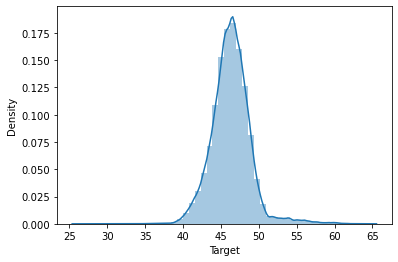

In [6]:
 #EDA
#Disttribution of target
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train.Target)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
active_power_calculated_by_converter,909604.0,525.886061,474.619576,0.000000,149.620898,379.989929,781.357475,1999.999858
active_power_raw,909604.0,537.639468,482.394907,0.000008,155.813244,383.985926,800.261108,1999.984456
ambient_temperature,909604.0,25.573921,8.025649,5.616541,17.093680,27.919035,32.171696,48.089017
generator_speed,909604.0,931.130882,193.674384,0.000000,770.538574,884.068502,1123.335856,1267.140625
generator_winding_temp_max,909604.0,60.730112,9.721582,25.636366,54.916767,60.034490,65.737187,129.846405
grid_power10min_average,909604.0,527.579537,472.656976,0.000000,147.181552,391.303187,794.875710,1999.991455
nc1_inside_temp,909604.0,31.755823,3.929794,11.141922,29.913803,31.762946,33.469745,52.790030
nacelle_temp,909604.0,31.686413,3.554426,16.010218,30.267423,31.961610,33.546260,48.406106
reactice_power_calculated_by_converter,909604.0,111.080610,78.219944,-318.393721,81.540850,92.005826,124.879153,523.892695
reactive_power,909604.0,133.692333,91.232152,-5.461607,96.045765,107.633378,154.153730,592.815938


* some of the values are +ve,-ve and 0
* this hints that since the data has different scales,it will not good pattern  capturing
* therefore we will transform the data
* some hints for transformation -Log Transformation,Power transformation,Box-Cox Transformation

<Figure size 1440x1152 with 0 Axes>

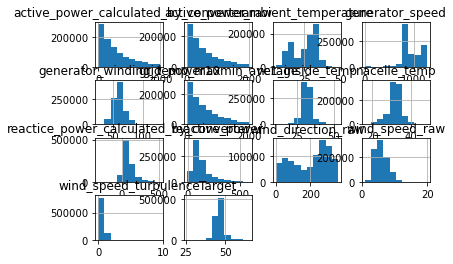

In [9]:
plt.figure(figsize=(20,16))
train.hist()
plt.show()

In [10]:
#TimeStamp-Day,Month,Year,Hour,Minute,Weekday
train['day']=pd.DatetimeIndex(train.timestamp).day
train['month']=pd.DatetimeIndex(train.timestamp).month
train['year']=pd.DatetimeIndex(train.timestamp).year
train['hour']=pd.DatetimeIndex(train.timestamp).hour
train['minute']=pd.DatetimeIndex(train.timestamp).minute
train['weekday']=pd.DatetimeIndex(train.timestamp).weekday

In [11]:
#test data 
test['day']=pd.DatetimeIndex(test.timestamp).day
test['month']=pd.DatetimeIndex(test.timestamp).month
test['year']=pd.DatetimeIndex(test.timestamp).year
test['hour']=pd.DatetimeIndex(test.timestamp).hour
test['minute']=pd.DatetimeIndex(test.timestamp).minute
test['weekday']=pd.DatetimeIndex(test.timestamp).weekday

In [12]:
# drop the insigificant
newtrain=train.drop(['timestamp','year','turbine_id','Target'],axis=1)
target=train.Target

test.drop(['timestamp','year'],axis=1,inplace=True)

In [13]:
#feature Engineering
newtrain.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'day',
       'month', 'hour', 'minute', 'weekday'],
      dtype='object')

In [14]:
#Active power raw
newtrain['diff_active_power']=newtrain['active_power_raw']-newtrain['active_power_calculated_by_converter']
test['diff_active_power']=test['active_power_raw']-test['active_power_calculated_by_converter']

#nacelle temp
newtrain['diff_nacelle']=newtrain['nacelle_temp']-newtrain['nc1_inside_temp']
test['diff_nacelle']=test['nacelle_temp']-test['nc1_inside_temp']

#Reactive power

newtrain['diff_react']=newtrain['reactive_power']-newtrain['reactice_power_calculated_by_converter']
test['diff_react']=test['reactive_power']-test['reactice_power_calculated_by_converter']


In [15]:
newtrain.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'day',
       'month', 'hour', 'minute', 'weekday', 'diff_active_power',
       'diff_nacelle', 'diff_react'],
      dtype='object')

In [16]:
#lets build Random forest model
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import catboost as cboost

In [17]:
#model instances
rf=RandomForestRegressor(random_state=42)
etr=ExtraTreesRegressor(random_state=123,n_estimators=200)
lgbm=LGBMRegressor(random_state=494)
xgbr=XGBRegressor(random_state=500)
cbr=cboost.CatBoostRegressor(random_state=0)

In [ ]:
#fit and predict
pred_rf=rf.fit(newtrain,target).predict(test.drop('turbine_id',axis=1))

In [ ]:
pred_rf

 ## Log Transformation

In [ ]:
# apply log transformation
features=['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence', 'diff_active_power',
       'diff_nacelle', 'diff_react']

In [ ]:
#has +ve ,-ve ....
for i in features:
    #use very small values for neagative and zero values
    newtrain[i]=newtrain[i].apply(lambda col:0.000001 if col<=0 else col)
    newtrain[i]=np.log(newtrain[i])

In [ ]:
#test
for i in features:
    #use very small values for neagative and zero values
    test[i]=test[i].apply(lambda col:0.000001 if col<=0 else col)
    test[i]=np.log(test[i])

In [ ]:
newtrain.head()

In [ ]:
#turbine id
train.turbine_id.unique()

In [ ]:
# test
test.turbine_id.unique()

# we can see that values are same in both means we have train and test with same values

In [ ]:
# using target with mean value of turbine id


# Target mean encoding

encoded=train.groupby('turbine_id')['Target'].mean()

In [ ]:
# map the Train and test
newtrain['turbine_id']=train.turbine_id.map(encoded)
test['turbine_id']=test.turbine_id.map(encoded)

In [ ]:
newtrain.head()

## Feature Selection using RFE

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
selector=RFECV(estimator=dtree,step=1,cv=5,verbose=5,
               scoring='neg_mean_absolute_percentage_error',min_features_to_select=5)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#
rfetrain=newtrain.loc[:,['nacelle_temp','ambient_temperature','turbine_id','hour','day','month']]

rfetest=test.loc[:,['nacelle_temp','ambient_temperature','turbine_id','hour','day','month']]

## Ensembles

* Split the data in train and test
* Build  my models -ExtraTree,CatBoost,XGB,Lightgbm and Rf

* Take the Ensembles and find the Median Predicted Values and Submit it

In [ ]:
#train test split

# stratify we will use in categorical only
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(rfetrain,target,test_size=0.20,random_state=598,
                                               stratify=train['turbine_id'])

In [ ]:
# Build ensemble model
from sklearn.metrics import mean_absolute_percentage_error

final_prediction=[]

for model,names in zip([rf,etr,lgbm,xgbr,cbr],['rf','etr','lgbm','xgbr','cbr']):
    

    #fit the model and find the MAPE of each model
    pred=model.fit(X_train,y_train).predict(X_test)

    #print the MAPE
    print('{} MAPE is:'.format(names,mean_absolute_percentage_error(ytest,pred)))

# final prediction
final_prediction.append(model.predict(rfetest))

## Summary of the models

* Taking Date,Time and Creating the new Features gave us 0.0074

* Mean Encoding+Log Transformation on Features date and time -0.00316

# Note- 
* In both the Models ,only Random Forest has been able to secure a very good score.


# Next Steps-

* one can try parameter tuning of the Random Forest Model

* one can explore the LightGBM Model

        